# Descriptive Statistics

Descriptive statistics help summarize and describe the main features of a dataset. These statistics are categorized into measures of central tendency, dispersion, shape, and location.

In this notebook:
1. **Measures of Central Tendency**: Mean, Median, Mode
2. **Measures of Dispersion**: Variance, Standard Deviation, Range,Interquartile Range (IQR)
3. **Skewness and Kurtosis**: Understanding the shape of data distributions
4. **Percentiles and Quartiles**: Breaking data into sections

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a fake dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)  # Normal distribution (mean=50, std=10, 1000 samples)

# Convert to pandas DataFrame for convenience
df = pd.DataFrame(data, columns=['Values'])

# Display first 5 rows
print("First 5 rows of the dataset:\n", df.head())


First 5 rows of the dataset:
       Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


## 1. Measures of Central Tendency
Central tendency refers to the center or typical value of a dataset. The three main measures are:

- **Mean**: The average of all data points.
- **Median**: The middle value when data points are sorted.
- **Mode**: The most frequently occurring value(s) in the dataset.

In [15]:
# Mean
mean_value = df['Values'].mean()

# Median
median_value = df['Values'].median()

# Mode
mode_value = df['Values'].mode()[0]  # mode() returns a Series, so we take the first element

print(df.head(5))
print("Measures of Central Tendency:")
print(f"  - Mean: {mean_value:.2f}\n  - Median: {median_value:.2f}\n  - Mode: {mode_value:.2f}\n")

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
Measures of Central Tendency:
  - Mean: 50.19
  - Median: 50.25
  - Mode: 17.59



### 1.1 When to use it

These measures (mean, median, mode) help you understand the "central" or typical value of your data. You use them when you need to summarize a dataset with a single number that represents its center.

- **Mean**:
  - **When to Use**: 
    - Use the mean when your data is normally distributed (i.e., it follows a bell-shaped curve) and there are no outliers that might skew the results.
  - **Example**: 
    - In a dataset of employees' salaries in a company where most salaries are normally distributed, the mean salary would represent the typical salary of an employee.

- **Median**:
  - **When to Use**: 
    - Use the median when your data is skewed or has outliers. The median is less sensitive to extreme values and provides a better central tendency for skewed distributions.
  - **Example**: 
    - In a dataset of house prices in a city where some properties are extremely expensive (outliers), the median price gives a more accurate reflection of what a typical house costs.

- **Mode**:
  - **When to Use**: 
    - Use the mode when you want to know the most frequent value in your dataset. This is useful for categorical data or data with repeated values.
  - **Example**: 
    - In a dataset of customer preferences for ice cream flavors, the mode would tell you which flavor is the most popular.

# 2. Measures of Dispersion

Dispersion describes the spread or variability in the data. Key measures include:

- **Variance**: The average of the squared differences from the mean.
- **Standard Deviation**: The square root of variance, indicating the spread of data.
- **Range**: The difference between the maximum and minimum values.
- **Interquartile Range (IQR)**: The range within the middle 50% of the data (Q3 - Q1).

In [13]:
# Variance
variance_value = df['Values'].var()

# Standard Deviation
std_dev_value = df['Values'].std()

# Range
range_value = df['Values'].max() - df['Values'].min()

# Interquartile Range (IQR)
q1 = df['Values'].quantile(0.25)
q3 = df['Values'].quantile(0.75)
iqr_value = q3 - q1

print(df.head(5))
print("Measures of Dispersion:")
print(f"  - Variance: {variance_value:.2f}\n  - Standard Deviation: {std_dev_value:.2f}")
print(f"  - Range: {range_value:.2f}\n  - IQR: {iqr_value:.2f}")

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
Measures of Dispersion:
  - Variance: 95.89
  - Standard Deviation: 9.79
  - Range: 70.94
  - IQR: 12.96


### 2.1 When to use it

Measures of dispersion (variance, standard deviation, range, IQR) describe how spread out the data is. These are crucial when you want to understand the variability in your data.

- **Variance and Standard Deviation**:
  - **When to Use**:
    - Use variance and standard deviation when you need to measure the spread of data points around the mean. These are useful for comparing the variability between different datasets.
  - **Example**:
    - In a dataset comparing the test scores of students from two different schools, you might use standard deviation to see which school's scores are more spread out (more variability).

- **Range**:
  - **When to Use**:
    - Use the range when you want a quick, rough idea of the spread of your data. The range is very sensitive to outliers, so it's often not enough on its own.
  - **Example**:
    - In a dataset of temperatures recorded over a week, the range would show you the difference between the highest and lowest temperatur es.

- **Interquartile Range (IQR)**:
    - **When to Use**:
        -   Use the IQR when you need a measure of variability that is not affected by outliers. The IQR focuses on the middle 50% of the data.
  - **Example**:
    - In a dataset of the time it takes customers to complete a checkout process, the IQR would show the spread of the central portion of the data, ignoring any extreme values (very fast or very slow checkouts).

## 3 Skewness and Kurtosis

These are used to understand the shape of the data distribution:

- **Skewness**: Measures the asymmetry of the distribution. Positive skew means the tail is on the right, negative skew means the tail is on the left.
- **Kurtosis**: Measures the "tailedness" of the distribution. High kurtosis indicates heavy tails, and low kurtosis indicates light tails.

In [17]:
# Skewness
skewness_value = df['Values'].skew()

# Kurtosis
kurtosis_value = df['Values'].kurtosis()

print(df.head(5))
print(f"- Skewness: {skewness_value:.2f}\n- Kurtosis: {kurtosis_value:.2f}")


      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
- Skewness: 0.12
- Kurtosis: 0.07


### 3.1 When to use it

These help you understand the shape of the data distribution, especially in relation to normality.

- **Skewness**:
  - **When to Use**: 
      - Use skewness when you need to understand the asymmetry of the data distribution. Skewness tells you whether the tail is longer on the left or right.
  - **Example**: 
      - In a dataset of income levels in a population, if the skewness is positive, it indicates that there are a few extremely high earners (long right tail), pulling the average up.

- **Kurtosis**:
  - **When to Use**: 
      - Use kurtosis when you want to understand the tailedness of your data distribution. High kurtosis means more extreme values (heavy tails).
  - **Example**: 
      - In financial data, high kurtosis may indicate that extreme events (e.g., market crashes) are more frequent than in a normal distribution, which is critical for risk assessment.

## 4. Percentiles and Quartiles
Percentiles and quartiles help break down data into sections:

- **Percentiles**: Divides the data into 100 equal parts. For example, the 90th percentile is the value below which 90% of the data falls.
- **Quartiles**: Divides the data into four equal parts. The most common quartiles are:
  - **Q1 (25th percentile)**: The value below which 25% of the data lies.
  - **Q2 (50th percentile)**: The median (50th percentile).
  - **Q3 (75th percentile)**: The value below which 75% of the data lies.

In [19]:
# Percentiles
percentile_90 = np.percentile(df['Values'], 90)

# Quartiles
q1 = np.percentile(df['Values'], 25)
q2 = np.percentile(df['Values'], 50)  # Same as the median
q3 = np.percentile(df['Values'], 75)

print(df.head(5))
print("Percentiles and Quartiles:")
print(f"  - 90th Percentile: {percentile_90:.2f}")
print(f"  - Q1: {q1:.2f}\n  - Q2 (Median): {q2:.2f}\n  - Q3: {q3:.2f}")

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
Percentiles and Quartiles:
  - 90th Percentile: 63.06
  - Q1: 43.52
  - Q2 (Median): 50.25
  - Q3: 56.48


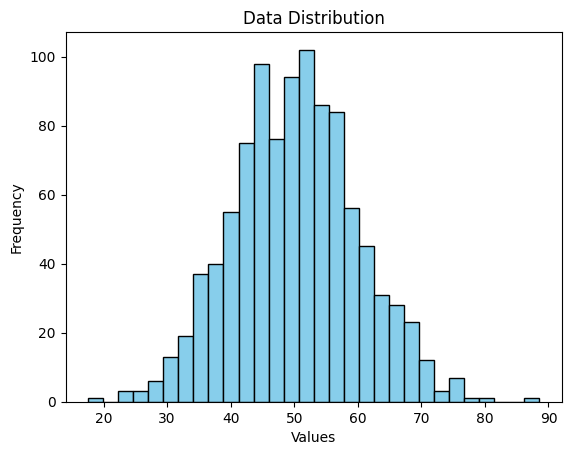

In [20]:
# Plot histogram of the data
plt.hist(df['Values'], bins=30, color='skyblue', edgecolor='black')
plt.title('Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# 4.1 When to use it

Percentiles and quartiles are useful when you want to break your data into segments and understand the distribution relative to other data points.

- **Percentiles**:
  - **When to Use**:
    - Use percentiles when you need to understand the relative standing of a particular data point within a dataset. Percentiles are often used in scoring systems (e.g., standardized tests) to rank performance.
  - **Example**:
    - In a dataset of student test scores, knowing that a student is in the 90th percentile means that they scored higher than 90% of the students.

- **Quartiles**:
  - **When to Use**:
    - Use quartiles when you want to divide your data into four equal parts. This is especially helpful for detecting outliers and understanding the spread of your data in chunks.
  - **Example**:
    - In a dataset of employee salaries, you could use quartiles to categorize employees into the lowest 25% (Q1), median 50% (Q2), and highest 25% (Q3) salary rangs.

# Summary

- **Mean, Median, Mode**: These give us a sense of the central location of our data. For a normal distribution, they tend to be close to each other.
- **Variance, Standard Deviation**: These tell us how spread out the data is. A higher standard deviation indicates more spread.
- **Range and IQR**: These give us an idea of the overall spread (range) and the spread of the middle 50% of the data (IQR).
- **Skewness and Kurtosis**: These shape parameters tell us about the symmetry and tails of the distribution. For a normal distribution, skewness is around 0, and kurtosis is around 3.
- **Percentiles and Quartiles**: These help divide the data into sections, giving insights into the relative standing of data points.


# Practical Guide to Data Analysis

This will help you guide through a statistical analysis of any dataset.

1. **Initial Exploration**:
   - Start with mean, median, and mode to get a sense of the central tendency.
   - Calculate range to get a rough idea of the spread.
2. **Deep Dive into Dispersion**:
   - If you need more insight into variability, calculate variance and standard deviation.
   - Use IQR to understand the spread while ignoring potential outliers.
3. **Shape Analysis**:
   - Check skewness to see if your data is symmetrical or has a long tail.
   - Look at kurtosis to see how prone your data is to producing outliers (extreme values).
4. **Segmentation**:
   - Use percentiles and quartiles when you need to break your data into meaningful chunks, especially for rankings or to identify outliers.

**Example Scenario**

Suppose you are analyzing customer satisfaction survey data (scores range from 1 to 10) for a company, and you need to summarize and understand the data distribution.

1. **Central Tendency**: Calculate the mean to report the average satisfaction level. If the data has outliers (e.g., a few very low scores), use the median instead to avoid skewing the result.
2. **Dispersion**: Calculate the standard deviation to report how varied the customer satisfaction scores are. If there are extreme outliers, use the IQR to focus on the variability of the middle portion of the data.
3. **Shape Analysis**: Calculate skewness to see if the satisfaction scores are skewed (e.g., most people gave high scores, but a few gave very low scores). If kurtosis is high, this might indicate that extreme dissatisfaction or high satisfaction happens more often than expected.
4. **Segmentation**: Use percentiles to identify top 10% (90th percentile) and bottom 10% (10th percentile) customer satisfaction levels. This can help target efforts to improve satisfaction for the lowest-scoring customers.